In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle
import math

import matplotlib.pyplot as plt
%matplotlib notebook

/Users/JH/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Data Parsing

In [2]:
# file directory in local data-base
file = '/Users/JH/Desktop/NTU/NTU_Research/data/NEM_Load_Forecasting_Database.xls'

# hyper parameter
QLD = 'Actual_Data_QLD'
NSW = 'Actual_Data_NSW'
VIC = 'Actual_Data_VIC'
SA = 'Actual_Data_SA'
TAS = 'Actual_Data_TAS'

In [3]:
# Set Classes as Data Container

        
class Structure:
    def __init__(self):
        self._feature = []
        self._target = []
        
    @property
    def feature(self):
        return self._feature
    @property
    def target(self):
        return self._target
    
    @feature.setter
    def feature(self, value):
        self._feature = value
        
    @target.setter
    def target(self, value):
        self._target = value
        
class Data:
    def __init__(self):
        pass
    class Train(Structure):
        def __init__(self):
            pass

    class Test(Structure):
        def __init__(self):
            pass
            
class DataSet:
    def __init__(self):
        pass
    class Raw:
        def __init__(self):
            pass
        class Train(Structure):
            def __init__(self):
                pass

        class Test(Structure):
            def __init__(self):
                pass
    class PreProcessed:
        def __init__(self):
            pass
        class Train(Structure):
            def __init__(self):
                pass

        class Test(Structure):
            def __init__(self):
                pass

In [4]:
dataset = DataSet()

In [5]:
dataset.Raw.Train.feature=1
dataset.Raw.Test.feature=2
dataset.Raw.Train.target=3
dataset.Raw.Test.target=4

dataset.PreProcessed.Train.feature=5
dataset.PreProcessed.Test.feature=6
dataset.PreProcessed.Train.target=7
dataset.PreProcessed.Test.target=8


In [6]:
print dataset.Raw.Train.feature
print dataset.Raw.Test.feature
print dataset.Raw.Train.target
print dataset.Raw.Test.target
print dataset.PreProcessed.Train.feature
print dataset.PreProcessed.Test.feature
print dataset.PreProcessed.Train.target
print dataset.PreProcessed.Test.target

1
2
3
4
5
6
7
8


In [7]:
def normalization(data):
    return (data - min(data)) / (max(data) - min(data))

def data_splitter(data, ratio=0.8):
    """
    split data into training data & testing data
    :param data:

    :param ratio:
        training data ratio
    :return:
        train_data, test_data
    """
    splitter = int(len(data) * ratio)
    return np.array(data[:splitter]), np.array(data[splitter + 1:])

In [8]:
df = pd.read_excel(file, sheetname=QLD)

In [9]:
temp = np.array(df.loc[600][5:53])
print type(temp)
print temp.shape
print

tem_max = df.loc[600][3]
tem_mean = df.loc[600][4]
print tem_max
print tem_mean
print

temp_avg = np.average(temp)
print temp_avg 

<type 'numpy.ndarray'>
(48,)

24.9
20.35

5942.7125


<IPython.core.display.Javascript object>


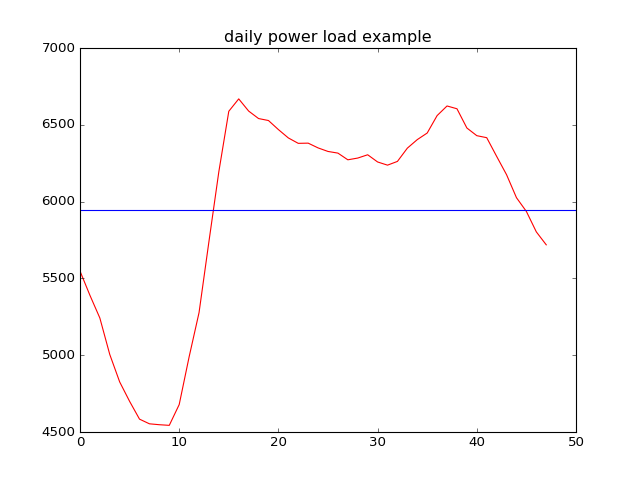

In [10]:
time = np.arange(0, 48, 1)

plt.plot(time, temp, 'r-')
plt.axhline(temp_avg)
plt.title('daily power load example')
plt.show()


In [12]:
plt.close()

<IPython.core.display.Javascript object>


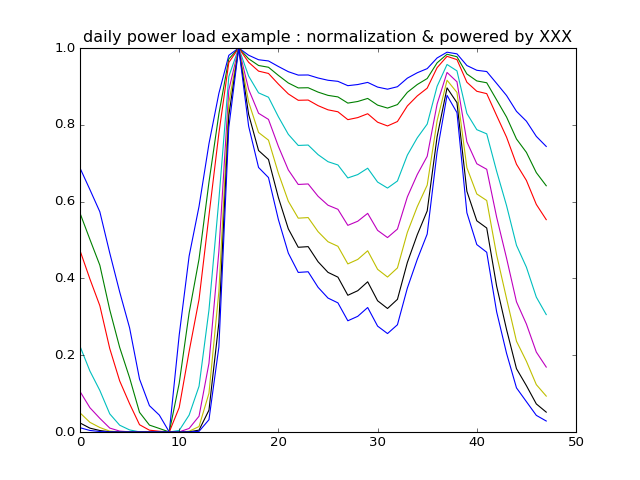

In [13]:
plt.plot(time, normalization(temp)**0.5, 
         time, normalization(temp)**0.75, 
         time, normalization(temp), 
         time, normalization(temp)**2, 
         time, normalization(temp)**3, 
         time, normalization(temp)**4, 
         time, normalization(temp)**5,
         time, normalization(temp)**6)
plt.title('daily power load example : normalization & powered by XXX')
plt.show()

In [15]:
plt.close()

In [16]:
def preprocessing_filter(data, nominator, denominator):
    return normalization(data)**(nominator/denominator)

def preprocessing(data_present, temperature_max, temperature_mean, denominator):
    data_present = list(data_present)+list(preprocessing_filter(np.array(data_present), temperature_max, denominator))+list(preprocessing_filter(np.array(data_present), temperature_mean, denominator))
    
    return np.array(data_present)

In [17]:
def data_alloter(df):
    dataset = DataSet()
    denominator = df['Mean Tem.'].min()
    
    raw_feature = []
    raw_target = []
    preprocessed_feature = []
    preprocessed_target = []
    
    
    for row in xrange(0, len(df)):
        # if both MaxTemp and MeanTemp are not nan
        if not math.isnan(df['Max Tem.'][row]) and not math.isnan(df['Mean Tem.'][row]):
            if not math.isnan(df['Max Tem.'][row+1]) and not math.isnan(df['Mean Tem.'][row+1]):
                powerload_present = normalization(np.array(df.loc[row][5:53]))
                powerload_future = normalization(np.array(df.loc[row+1][5:53]))
                
                raw_feature.append(np.array(list(powerload_present) + list([df['Max Tem.'][row+1]]) + list([df['Mean Tem.'][row+1]])))
                raw_target.append(np.array(powerload_future))
                
                preprocessed_powerload_present = preprocessing(powerload_present, 
                                                               df['Max Tem.'][row+1], 
                                                               df['Mean Tem.'][row+1],
                                                               denominator)
                
                preprocessed_feature.append(preprocessed_powerload_present)
                preprocessed_target.append(np.array(powerload_future))
    

    dataset.Raw.Train.feature, dataset.Raw.Test.feature = data_splitter(raw_feature)
    dataset.Raw.Train.target, dataset.Raw.Test.target = data_splitter(raw_target)
    
    dataset.PreProcessed.Train.feature, dataset.PreProcessed.Test.feature = data_splitter(preprocessed_feature)
    dataset.PreProcessed.Train.target, dataset.PreProcessed.Test.target = data_splitter(preprocessed_target)

    
    return dataset
            

In [18]:
dataset = data_alloter(df)

In [19]:
print dataset.Raw.Train.feature
print type(dataset.Raw.Train.feature)
print dataset.Raw.Train.feature.shape
print 

print dataset.Raw.Train.feature[0]
print type(dataset.Raw.Train.feature[0])
print dataset.Raw.Train.feature[0].shape

[[  0.41645874   0.32871269   0.27686905 ...,   0.45481009  22.9         19.3       ]
 [  0.36999413   0.29671768   0.23030385 ...,   0.54562283  22.4         18.35      ]
 [  0.42253022   0.31567994   0.2529779  ...,   0.5008192   20.          16.85      ]
 ..., 
 [  0.31619394   0.24573062   0.18005643 ...,   0.41810217  22.7         19.05      ]
 [  0.33889922   0.26374117   0.19140945 ...,   0.4129788   24.4         19.75      ]
 [  0.39123644   0.29457701   0.23193059 ...,   0.46898048  24.3         21.05      ]]
<type 'numpy.ndarray'>
(340, 50)

[  4.16458738e-01   3.28712688e-01   2.76869051e-01   1.96146382e-01
   1.02393494e-01   4.84705665e-02   1.54329544e-02   1.28453932e-02
   0.00000000e+00   1.67729415e-02   6.26559468e-02   1.84687182e-01
   3.12910082e-01   5.01940671e-01   6.71425931e-01   8.38231217e-01
   9.07263654e-01   9.34340634e-01   9.30182053e-01   9.25422789e-01
   8.95434803e-01   8.79308752e-01   8.56713797e-01   8.25524443e-01
   8.00711579e-01   7.959523

In [20]:
print dataset.Raw.Test.target
print type(dataset.Raw.Test.target)
print dataset.Raw.Test.target.shape
print 

print dataset.Raw.Test.target[0]
print type(dataset.Raw.Test.target[0])
print dataset.Raw.Test.target[0].shape

[[0.3341952704675315 0.25403511698711245 0.2049881136088752 ...,
  0.51507694874254495 0.46119197564332498 0.42624181507277809]
 [0.29966682163334885 0.23783511545017808 0.18239578490624489 ...,
  0.6018131101813109 0.53819928715326204 0.49492484115915081]
 [0.36260998834826624 0.27755233235565913 0.20551247539073481 ...,
  0.60179195628590942 0.51926553899312955 0.45546225240065896]
 ..., 
 [0.54468085106382991 0.43734602463605793 0.30795072788353861 ...,
  0.58566629339305709 0.57206047032474794 0.54496080627099674]
 [0.43033554329672569 0.34379270205982099 0.25947669416468438 ...,
  0.53697049445822165 0.47613745634900567 0.42876663798775239]
 [0.31184272653131306 0.24531055500708249 0.18465896896596121 ...,
  0.61703223591020306 0.54225865991329369 0.48886122676739485]]
<type 'numpy.ndarray'>
(85, 48)

[0.3341952704675315 0.25403511698711245 0.2049881136088752
 0.13975893564666117 0.098969846102514997 0.032322642532426914
 0.016098761312924662 0.003711890561788229 0.0 0.00959252617

In [21]:
print dataset.PreProcessed.Train.feature
print type(dataset.PreProcessed.Train.feature)
print dataset.PreProcessed.Train.feature.shape
print 

print dataset.PreProcessed.Train.feature[0]
print type(dataset.PreProcessed.Train.feature[0])
print dataset.PreProcessed.Train.feature[0].shape

[[ 0.41645874  0.32871269  0.27686905 ...,  0.45115058  0.36459951
   0.30766024]
 [ 0.36999413  0.29671768  0.23030385 ...,  0.57104205  0.48195851
   0.42241052]
 [ 0.42253022  0.31567994  0.2529779  ...,  0.57444725  0.48746493
   0.40524981]
 ..., 
 [ 0.31619394  0.24573062  0.18005643 ...,  0.35796007  0.33291131
   0.27588686]
 [ 0.33889922  0.26374117  0.19140945 ...,  0.35355031  0.30402207
   0.25821557]
 [ 0.39123644  0.29457701  0.23193059 ...,  0.3553276   0.33317106
   0.29066715]]
<type 'numpy.ndarray'>
(340, 144)

[  4.16458738e-01   3.28712688e-01   2.76869051e-01   1.96146382e-01
   1.02393494e-01   4.84705665e-02   1.54329544e-02   1.28453932e-02
   0.00000000e+00   1.67729415e-02   6.26559468e-02   1.84687182e-01
   3.12910082e-01   5.01940671e-01   6.71425931e-01   8.38231217e-01
   9.07263654e-01   9.34340634e-01   9.30182053e-01   9.25422789e-01
   8.95434803e-01   8.79308752e-01   8.56713797e-01   8.25524443e-01
   8.00711579e-01   7.95952315e-01   7.89622031e-01

In [22]:
print dataset.PreProcessed.Test.target
print type(dataset.PreProcessed.Test.target)
print dataset.PreProcessed.Test.target.shape
print 

print dataset.PreProcessed.Test.target[0]
print type(dataset.PreProcessed.Test.target[0])
print dataset.PreProcessed.Test.target[0].shape

[[0.3341952704675315 0.25403511698711245 0.2049881136088752 ...,
  0.51507694874254495 0.46119197564332498 0.42624181507277809]
 [0.29966682163334885 0.23783511545017808 0.18239578490624489 ...,
  0.6018131101813109 0.53819928715326204 0.49492484115915081]
 [0.36260998834826624 0.27755233235565913 0.20551247539073481 ...,
  0.60179195628590942 0.51926553899312955 0.45546225240065896]
 ..., 
 [0.54468085106382991 0.43734602463605793 0.30795072788353861 ...,
  0.58566629339305709 0.57206047032474794 0.54496080627099674]
 [0.43033554329672569 0.34379270205982099 0.25947669416468438 ...,
  0.53697049445822165 0.47613745634900567 0.42876663798775239]
 [0.31184272653131306 0.24531055500708249 0.18465896896596121 ...,
  0.61703223591020306 0.54225865991329369 0.48886122676739485]]
<type 'numpy.ndarray'>
(85, 48)

[0.3341952704675315 0.25403511698711245 0.2049881136088752
 0.13975893564666117 0.098969846102514997 0.032322642532426914
 0.016098761312924662 0.003711890561788229 0.0 0.00959252617

<IPython.core.display.Javascript object>


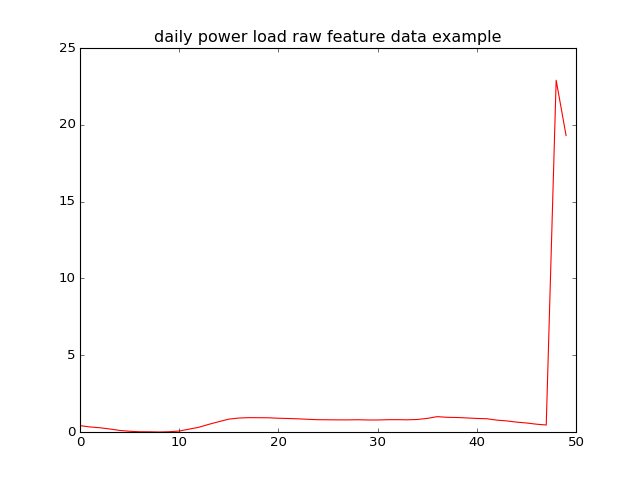

In [23]:
time = np.arange(0, 50, 1)
time_ = np.arange(0, 144, 1)

plt.plot(time, dataset.Raw.Train.feature[0][0:], 'r-')
plt.title('daily power load raw feature data example')
plt.show()

In [24]:
plt.close()

<IPython.core.display.Javascript object>


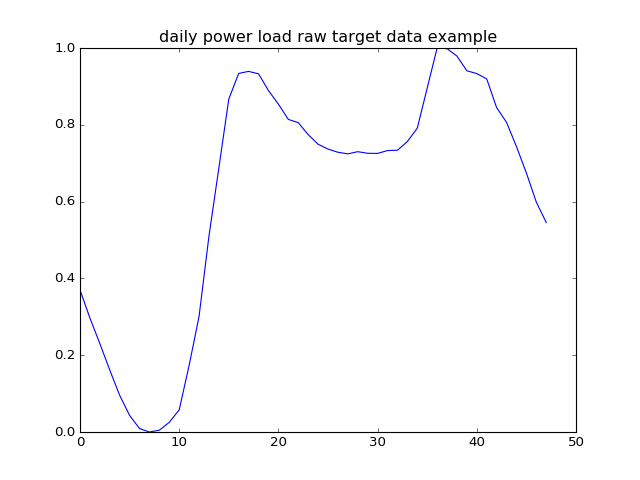

In [25]:
plt.plot(time[0:48], dataset.Raw.Train.target[0])
plt.title('daily power load raw target data example')
plt.show()

In [27]:
plt.close()

<IPython.core.display.Javascript object>


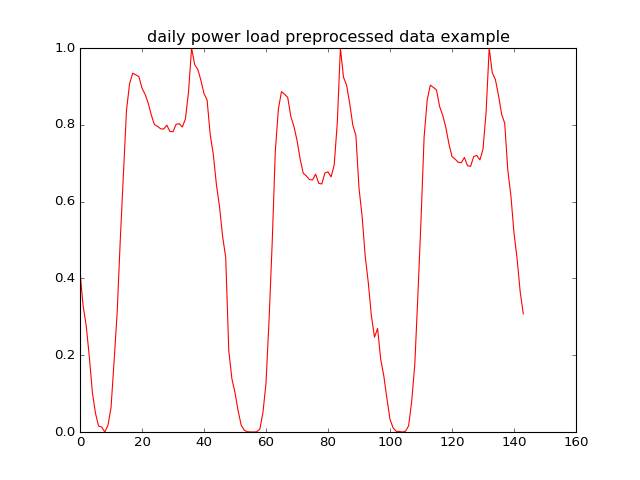

In [28]:
plt.plot(time_, dataset.PreProcessed.Train.feature[0], 'r-')
plt.title('daily power load preprocessed data example')
plt.show()

In [48]:
plt.close()

<IPython.core.display.Javascript object>


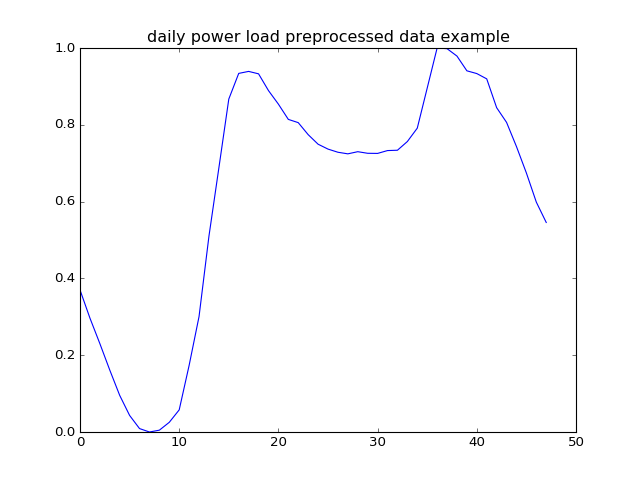

In [49]:
plt.plot(time[0:48], dataset.PreProcessed.Train.target[0])
plt.title('daily power load preprocessed data example')
plt.show()

In [29]:
plt.close()